In [2]:
# Step 1: Load Dataset
import pandas as pd

# Load the CSV file
df = pd.read_csv("creditcard.csv")

# Display basic info
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum().sum())
print("\nClass Distribution:\n", df['Class'].value_counts())
print("\nData Preview:\n", df.head())

✅ Dataset Loaded Successfully!
Shape: (25838, 31)

Columns:
 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Missing Values:
 28

Class Distribution:
 Class
0.0    25749
1.0       88
Name: count, dtype: int64

Data Preview:
    Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.

In [5]:
# Step 2: Train-Test Split and Standard Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1️⃣ Drop rows where target 'Class' is NaN
df = df.dropna(subset=['Class'])

# Optional: drop rows with NaN in features (or fill them)
df = df.dropna()  # or df.fillna(df.median(), inplace=True)

# 2️⃣ Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']


# Stratified split to preserve class ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Train-Test Split Done!")
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

# Initialize scaler
scaler = StandardScaler()

# Fit only on training data to prevent data leakage
X_train[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

print("✅ Standard Scaling applied on 'Time' and 'Amount' (fit on train, transform on test)")
print(X_train[['Time', 'Amount']].head())


✅ Train-Test Split Done!
Training Shape: (20669, 30)
Testing Shape: (5168, 30)
✅ Standard Scaling applied on 'Time' and 'Amount' (fit on train, transform on test)
           Time    Amount
6390  -1.006877 -0.190640
24066  1.180058 -0.357780
16694  0.750831 -0.357733
24081  1.180831 -0.325292
5857  -1.112015 -0.356690


In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


/tmp/ipython-input-1064134437.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


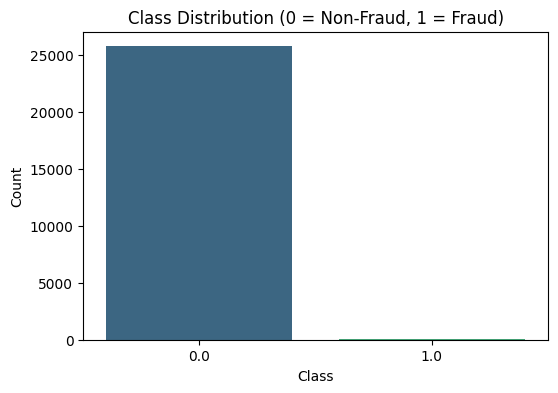

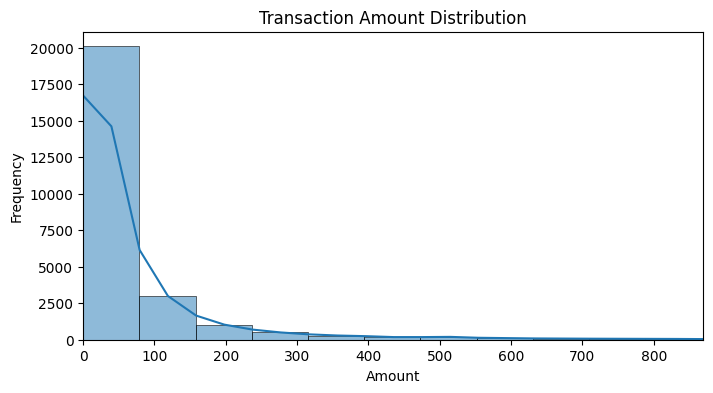

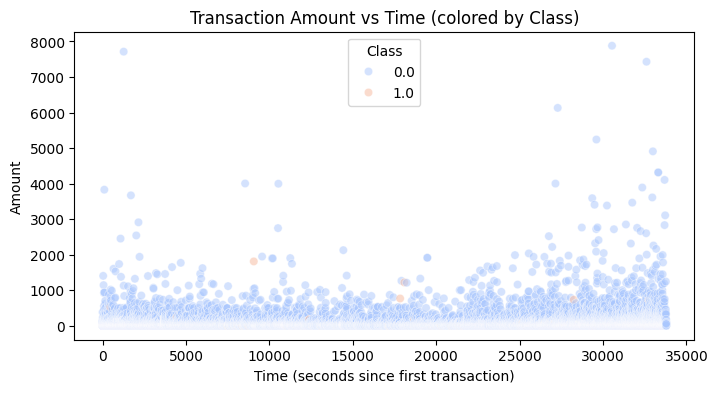

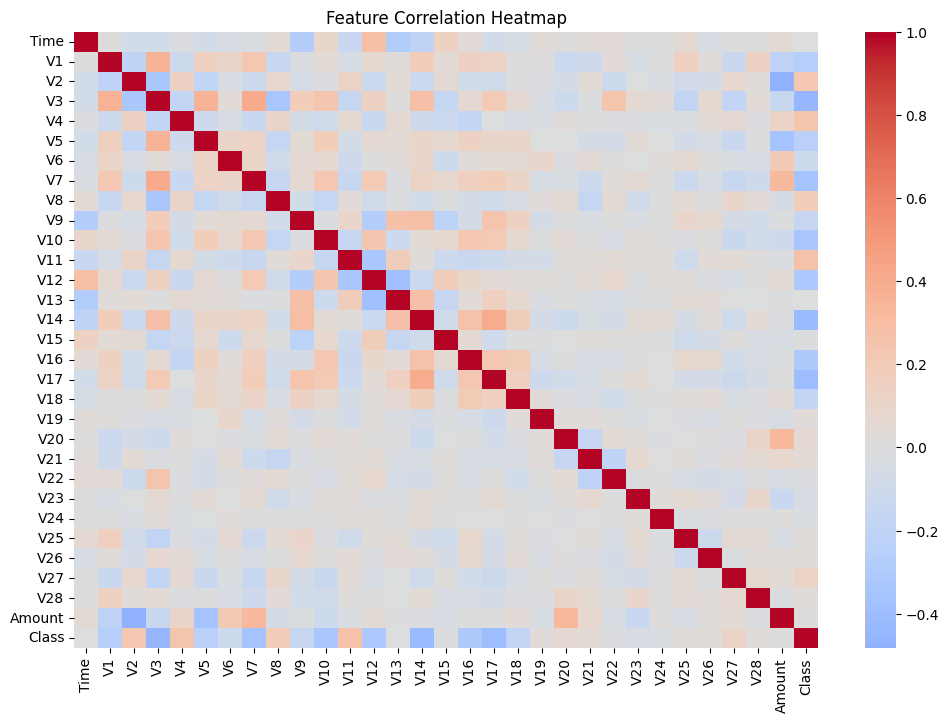

In [7]:
# Step 4: Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ----- 1️⃣ Class Distribution -----
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="viridis")
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# ----- 2️⃣ Amount Distribution -----
plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.xlim(0, df['Amount'].quantile(0.99))  # remove extreme outliers for clarity
plt.show()

# ----- 3️⃣ Time vs Amount -----
plt.figure(figsize=(8,4))
sns.scatterplot(x='Time', y='Amount', data=df, hue='Class', alpha=0.5, palette='coolwarm')
plt.title("Transaction Amount vs Time (colored by Class)")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Amount")
plt.legend(title='Class')
plt.show()

# ----- 4️⃣ Correlation Heatmap -----
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 12.8 MB/s eta 0:00:00


[I 2025-11-14 03:04:16,418] A new study created in memory with name: no-name-b36766ba-821c-48a4-9511-013686d40eb3


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-11-14 03:04:18,047] Trial 0 finished with value: 0.8205128205128205 and parameters: {'criterion': 'gini', 'max_depth': 13, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8205128205128205.
[I 2025-11-14 03:04:19,201] Trial 1 finished with value: 0.64 and parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8205128205128205.
[I 2025-11-14 03:04:20,926] Trial 2 finished with value: 0.7777777777777778 and parameters: {'criterion': 'gini', 'max_depth': 16, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8205128205128205.
[I 2025-11-14 03:04:21,861] Trial 3 finished with value: 0.49230769230769234 and parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.8205128205128205.
[I 2025-11-14 03:04:23,477] Trial 4 finished with value: 0.8205128205128205 and parameters: {'criterion'

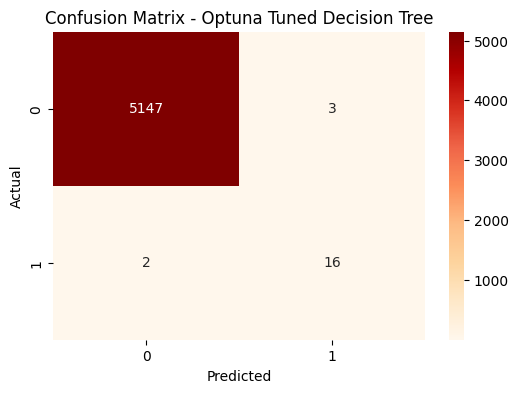

/tmp/ipython-input-3432658061.py:68: ExperimentalWarning: optuna.visualization.matplotlib._optimization_history.plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


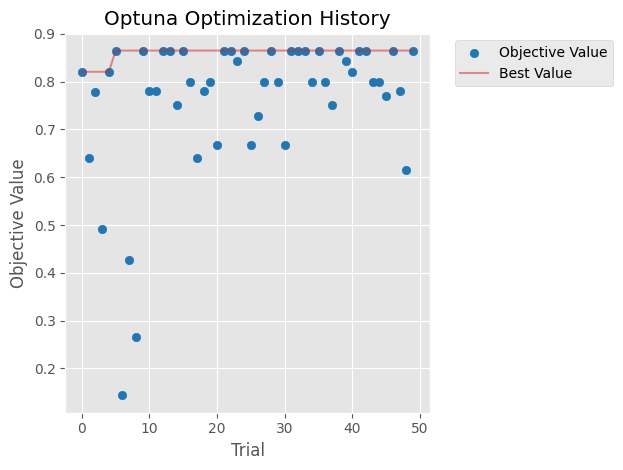

/tmp/ipython-input-3432658061.py:73: ExperimentalWarning: optuna.visualization.matplotlib._param_importances.plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


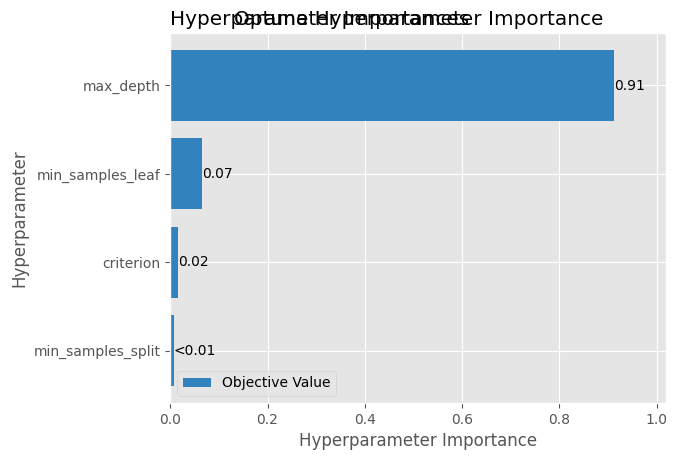

In [12]:
# Step 7: Hyperparameter Optimization using Optuna
!pip install optuna
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameter search space
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 2, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # Create model with sampled hyperparameters
    model = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Fit on SMOTE-resampled training data
    model.fit(X_train_resampled, y_train_resampled)

    # Predict on validation (test) data
    y_pred_val = model.predict(X_test)

    # Calculate F1-score (good for imbalance)
    score = f1_score(y_test, y_pred_val)

    return score

# Create and run the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Display the best hyperparameters
print("✅ Best Trial:")
print(study.best_trial.params)

# Train the final Decision Tree with best parameters
best_params = study.best_trial.params
best_dt = DecisionTreeClassifier(**best_params, random_state=42)
best_dt.fit(X_train_resampled, y_train_resampled)

# Predictions on test set
y_pred_optuna = best_dt.predict(X_test)

# ---------- Evaluation ----------
print("\n✅ Decision Tree (Optuna Tuned) Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_optuna))
print("\nClassification Report:\n", classification_report(y_test, y_pred_optuna, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_optuna)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='OrRd')
plt.title("Confusion Matrix - Optuna Tuned Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------- Plot Optuna optimization history ----------
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.title("Optuna Optimization History")
plt.show()

# ---------- Plot parameter importance ----------
optuna.visualization.matplotlib.plot_param_importances(study)
plt.title("Optuna Hyperparameter Importance")
plt.show()


✅ Decision Tree Model Trained Successfully!

Accuracy: 0.9984520123839009

Classification Report:
               precision    recall  f1-score   support

         0.0     0.9992    0.9992    0.9992      5150
         1.0     0.7778    0.7778    0.7778        18

    accuracy                         0.9985      5168
   macro avg     0.8885    0.8885    0.8885      5168
weighted avg     0.9985    0.9985    0.9985      5168



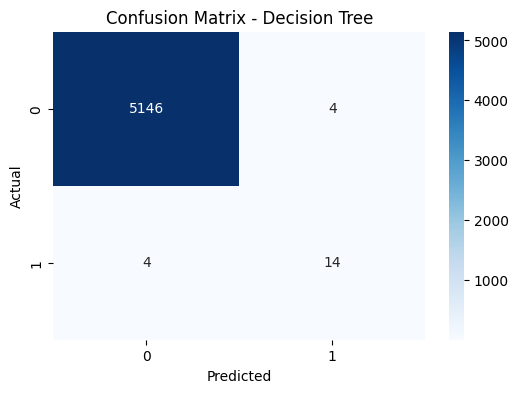

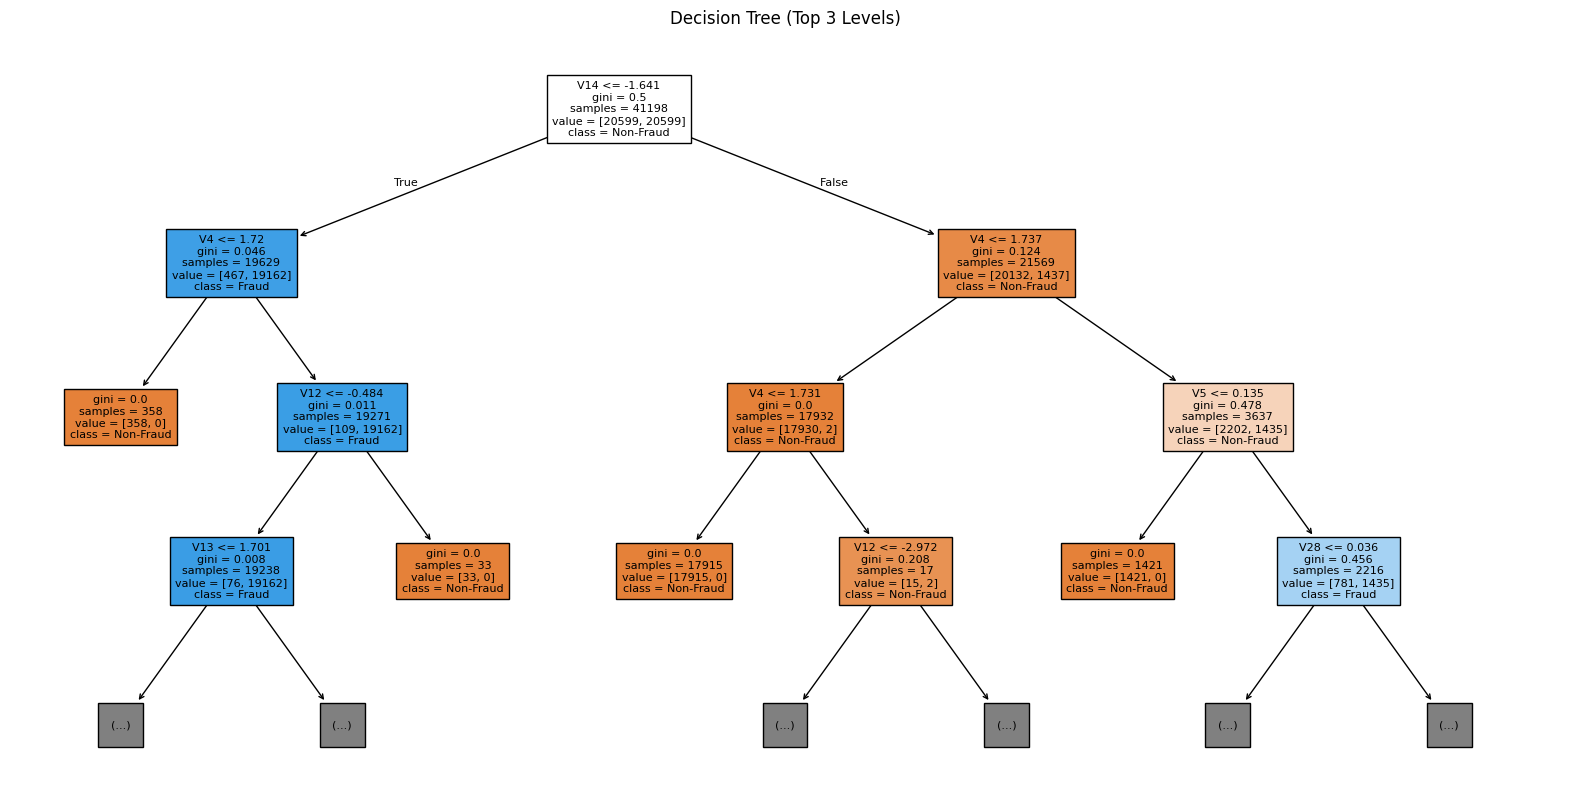

In [8]:
# Step 5: Train Decision Tree Model
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the model
dt = DecisionTreeClassifier(
    criterion='gini',       # or 'entropy'
    max_depth=None,         # can tune later
    random_state=42
)

# Fit on SMOTE-resampled training data
dt.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred = dt.predict(X_test)

# ---------- Evaluation ----------
print("✅ Decision Tree Model Trained Successfully!\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------- (Optional) Visualize the Tree ----------
plt.figure(figsize=(20,10))
plot_tree(
    dt,
    filled=True,
    feature_names=X_train.columns,
    class_names=['Non-Fraud','Fraud'],
    max_depth=3,            # visualize only top levels
    fontsize=8
)
plt.title("Decision Tree (Top 3 Levels)")
plt.show()


[I 2025-11-14 03:05:40,803] A new study created in memory with name: no-name-d2e43c17-401b-4355-b53f-3641a01e84a3


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-11-14 03:05:41,449] Trial 0 finished with value: 0.4383561643835616 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 18, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.4383561643835616.
[I 2025-11-14 03:05:45,760] Trial 1 finished with value: 0.7111111111111111 and parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 19, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.7111111111111111.
[I 2025-11-14 03:05:51,568] Trial 2 finished with value: 0.7272727272727273 and parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 7}. Best is trial 2 with value: 0.7272727272727273.
[I 2025-11-14 03:05:55,021] Trial 3 finished with value: 0.7692307692307693 and parameters: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 15, 'min_samples_leaf': 4}. Best is trial 3 with value: 0.7692307692307693.
[I 2025-11-14 03:05:57,622] Trial 4 finished with value: 0.7804878048780488 and param

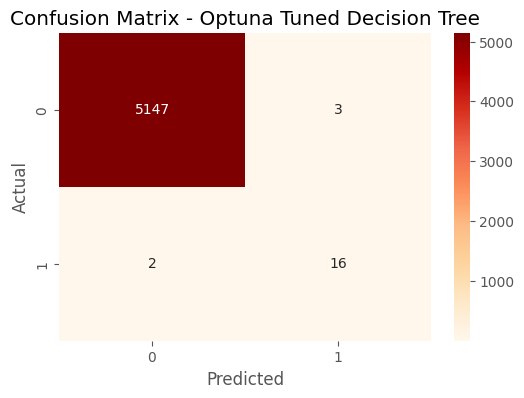

/tmp/ipython-input-1796059858.py:67: ExperimentalWarning: optuna.visualization.matplotlib._optimization_history.plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


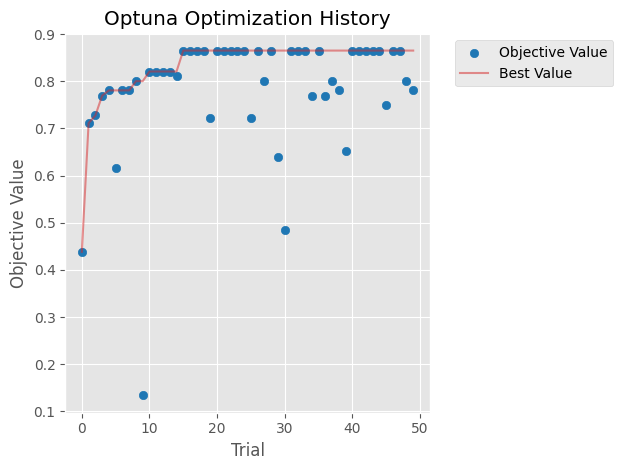

/tmp/ipython-input-1796059858.py:72: ExperimentalWarning: optuna.visualization.matplotlib._param_importances.plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


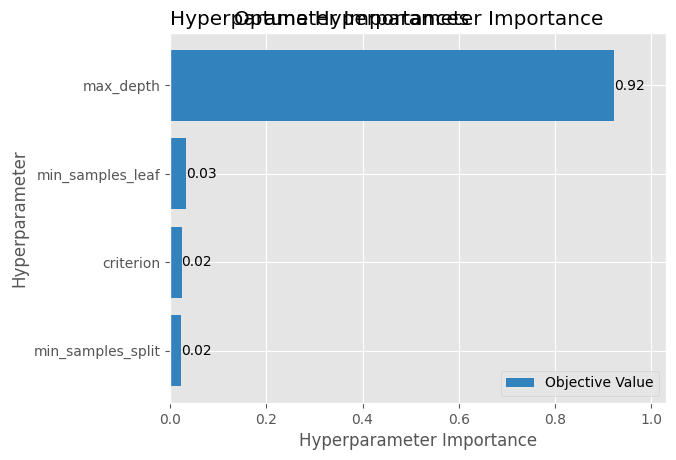

In [13]:
# Step 7: Hyperparameter Optimization using Optuna
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameter search space
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 2, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # Create model with sampled hyperparameters
    model = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Fit on SMOTE-resampled training data
    model.fit(X_train_resampled, y_train_resampled)

    # Predict on validation (test) data
    y_pred_val = model.predict(X_test)

    # Calculate F1-score (good for imbalance)
    score = f1_score(y_test, y_pred_val)

    return score

# Create and run the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Display the best hyperparameters
print("✅ Best Trial:")
print(study.best_trial.params)

# Train the final Decision Tree with best parameters
best_params = study.best_trial.params
best_dt = DecisionTreeClassifier(**best_params, random_state=42)
best_dt.fit(X_train_resampled, y_train_resampled)

# Predictions on test set
y_pred_optuna = best_dt.predict(X_test)

# ---------- Evaluation ----------
print("\n✅ Decision Tree (Optuna Tuned) Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_optuna))
print("\nClassification Report:\n", classification_report(y_test, y_pred_optuna, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_optuna)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='OrRd')
plt.title("Confusion Matrix - Optuna Tuned Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------- Plot Optuna optimization history ----------
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.title("Optuna Optimization History")
plt.show()

# ---------- Plot parameter importance ----------
optuna.visualization.matplotlib.plot_param_importances(study)
plt.title("Optuna Hyperparameter Importance")
plt.show()


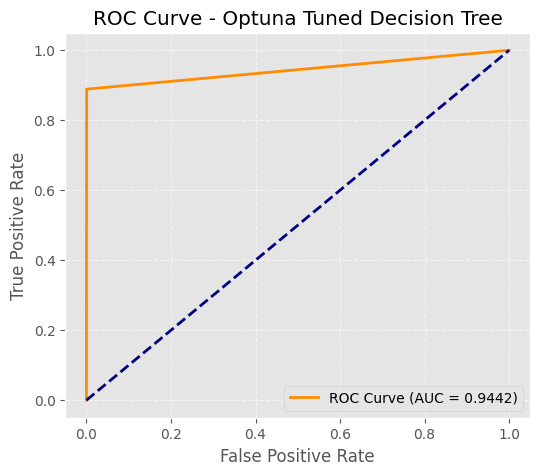

✅ ROC AUC Score: 0.9442


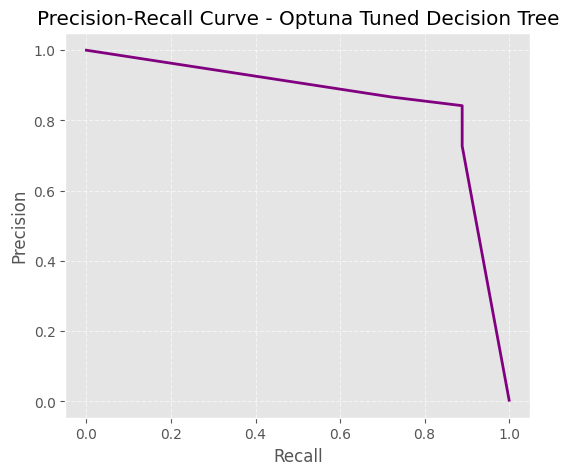

In [14]:
# Step 8: ROC and AUC Curve
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve

import matplotlib.pyplot as plt

# Get predicted probabilities for class = 1 (Fraud)
y_proba = best_dt.predict_proba(X_test)[:, 1]

# ---------- ROC Curve ----------
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Optuna Tuned Decision Tree')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(f"✅ ROC AUC Score: {roc_auc:.4f}")

# ---------- Precision-Recall Curve ----------
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Optuna Tuned Decision Tree')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



✅ Final Random Forest with Optuna-Tuned Hyperparameters

Accuracy: 0.9990325077399381

Classification Report:
               precision    recall  f1-score   support

         0.0     0.9998    0.9992    0.9995      5150
         1.0     0.8095    0.9444    0.8718        18

    accuracy                         0.9990      5168
   macro avg     0.9047    0.9718    0.9357      5168
weighted avg     0.9991    0.9990    0.9991      5168



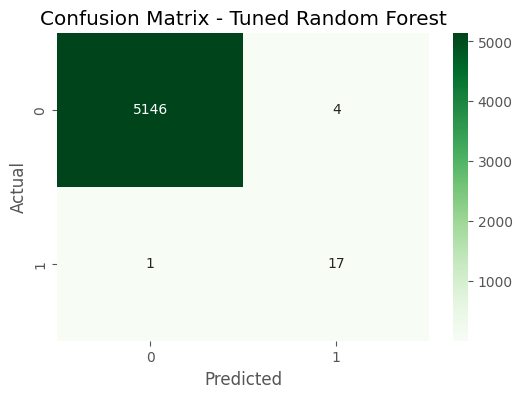

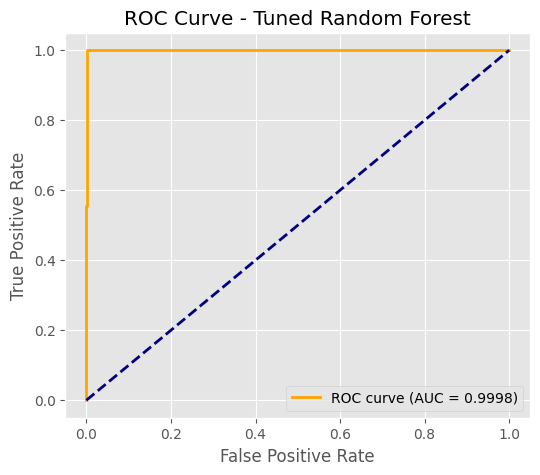

In [16]:
# Train final model with best hyperparameters
# Random Forest
from sklearn.ensemble import RandomForestClassifier
best_rf = RandomForestClassifier(
    **study.best_trial.params,
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_train_resampled, y_train_resampled)
y_pred_best = best_rf.predict(X_test)
y_pred_best_proba = best_rf.predict_proba(X_test)[:, 1]

# Evaluation
print("\n✅ Final Random Forest with Optuna-Tuned Hyperparameters\n")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best, digits=4))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC–AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_best_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve - Tuned Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


In [17]:
!pip install xgboost optuna

In [18]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

def objective(trial):
    # Define hyperparameter search space
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 5),  # helps class imbalance
        'random_state': 42,
        'n_jobs': -1,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }

    # Train model
    model = XGBClassifier(**param)
    model.fit(X_train_resampled, y_train_resampled)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred)
    return score

# Create and run Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30, show_progress_bar=True)

# Best parameters
print("✅ Best Trial:")
print("F1 Score:", study.best_trial.value)
print("Best Params:", study.best_trial.params)


[I 2025-11-14 03:09:48,526] A new study created in memory with name: no-name-93f1bf28-ae6d-4955-930e-be39cfed58e0


  0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:09:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:09:54,531] Trial 0 finished with value: 0.7659574468085106 and parameters: {'n_estimators': 471, 'max_depth': 5, 'learning_rate': 0.2619674441223331, 'subsample': 0.7897926905112872, 'colsample_bytree': 0.9681997592145264, 'gamma': 3.0631356592588395, 'min_child_weight': 3, 'reg_alpha': 5.843348294631408, 'reg_lambda': 1.319260280954172, 'scale_pos_weight': 4.267930300768462}. Best is trial 0 with value: 0.7659574468085106.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:09:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:09:57,786] Trial 1 finished with value: 0.7555555555555555 and parameters: {'n_estimators': 205, 'max_depth': 13, 'learning_rate': 0.1914723628205071, 'subsample': 0.6084238580377479, 'colsample_bytree': 0.9738131698063983, 'gamma': 4.237550523751745, 'min_child_weight': 8, 'reg_alpha': 0.03493210082281206, 'reg_lambda': 9.640859464054056, 'scale_pos_weight': 2.9965571047883905}. Best is trial 0 with value: 0.7659574468085106.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:09:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:07,819] Trial 2 finished with value: 0.7058823529411765 and parameters: {'n_estimators': 248, 'max_depth': 6, 'learning_rate': 0.021034124955226205, 'subsample': 0.8980862725964659, 'colsample_bytree': 0.575887604529122, 'gamma': 2.247712330192932, 'min_child_weight': 3, 'reg_alpha': 4.582822381061975, 'reg_lambda': 8.726270088085174, 'scale_pos_weight': 4.875343805175726}. Best is trial 0 with value: 0.7659574468085106.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:10,238] Trial 3 finished with value: 0.6666666666666666 and parameters: {'n_estimators': 188, 'max_depth': 13, 'learning_rate': 0.21518586317354146, 'subsample': 0.9271591282224434, 'colsample_bytree': 0.5118015782687977, 'gamma': 4.196169540666587, 'min_child_weight': 9, 'reg_alpha': 8.569007862282746, 'reg_lambda': 9.007997237870807, 'scale_pos_weight': 2.0224509947653453}. Best is trial 0 with value: 0.7659574468085106.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:12,838] Trial 4 finished with value: 0.6666666666666666 and parameters: {'n_estimators': 293, 'max_depth': 4, 'learning_rate': 0.2315126527626836, 'subsample': 0.9851403165324711, 'colsample_bytree': 0.6205949023926065, 'gamma': 2.6713577586032136, 'min_child_weight': 10, 'reg_alpha': 6.188319610338926, 'reg_lambda': 5.254603200667854, 'scale_pos_weight': 3.968084410478815}. Best is trial 0 with value: 0.7659574468085106.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:15,735] Trial 5 finished with value: 0.7727272727272727 and parameters: {'n_estimators': 141, 'max_depth': 15, 'learning_rate': 0.08188760847253765, 'subsample': 0.9314480656329103, 'colsample_bytree': 0.6351539559924455, 'gamma': 3.9265322771309794, 'min_child_weight': 3, 'reg_alpha': 4.7652437360270685, 'reg_lambda': 1.2384244460669747, 'scale_pos_weight': 2.6493004877898163}. Best is trial 5 with value: 0.7727272727272727.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:16,975] Trial 6 finished with value: 0.68 and parameters: {'n_estimators': 275, 'max_depth': 8, 'learning_rate': 0.27838155347233584, 'subsample': 0.7447759542385182, 'colsample_bytree': 0.9851520489320678, 'gamma': 0.8942568682451102, 'min_child_weight': 8, 'reg_alpha': 6.844576348523329, 'reg_lambda': 1.9318960909762983, 'scale_pos_weight': 3.450779412068624}. Best is trial 5 with value: 0.7727272727272727.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:18,202] Trial 7 finished with value: 0.8292682926829268 and parameters: {'n_estimators': 348, 'max_depth': 9, 'learning_rate': 0.24731330662055698, 'subsample': 0.8441895442984841, 'colsample_bytree': 0.8848829141915866, 'gamma': 0.9584822369103052, 'min_child_weight': 1, 'reg_alpha': 2.135229858566088, 'reg_lambda': 5.697499040746309, 'scale_pos_weight': 1.1543656992959206}. Best is trial 7 with value: 0.8292682926829268.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:20,936] Trial 8 finished with value: 0.85 and parameters: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.19929132635088495, 'subsample': 0.540517919433721, 'colsample_bytree': 0.8018222485077345, 'gamma': 0.08161495500543181, 'min_child_weight': 2, 'reg_alpha': 1.9415115263107086, 'reg_lambda': 3.3064571554488165, 'scale_pos_weight': 3.025344379501128}. Best is trial 8 with value: 0.85.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:22,545] Trial 9 finished with value: 0.6938775510204082 and parameters: {'n_estimators': 450, 'max_depth': 14, 'learning_rate': 0.09923432648238396, 'subsample': 0.5884467836971082, 'colsample_bytree': 0.9595380418353419, 'gamma': 2.5536172478017063, 'min_child_weight': 6, 'reg_alpha': 2.444271028995153, 'reg_lambda': 7.127341750032895, 'scale_pos_weight': 2.2639828464934406}. Best is trial 8 with value: 0.85.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:23,323] Trial 10 finished with value: 0.8717948717948718 and parameters: {'n_estimators': 108, 'max_depth': 11, 'learning_rate': 0.14476491214843942, 'subsample': 0.5251340992339009, 'colsample_bytree': 0.7799066575067466, 'gamma': 0.16628577134272102, 'min_child_weight': 1, 'reg_alpha': 0.010950813315016461, 'reg_lambda': 3.1569123288190983, 'scale_pos_weight': 1.404055115205709}. Best is trial 10 with value: 0.8717948717948718.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:24,093] Trial 11 finished with value: 0.85 and parameters: {'n_estimators': 102, 'max_depth': 11, 'learning_rate': 0.1334897616021827, 'subsample': 0.5101259677014263, 'colsample_bytree': 0.7644320286757506, 'gamma': 0.03837827293551491, 'min_child_weight': 1, 'reg_alpha': 0.10084542564598697, 'reg_lambda': 3.507938685956912, 'scale_pos_weight': 1.1309936418897084}. Best is trial 10 with value: 0.8717948717948718.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:24,728] Trial 12 finished with value: 0.8292682926829268 and parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.169596883394398, 'subsample': 0.6641966621637281, 'colsample_bytree': 0.7729949916351022, 'gamma': 0.0444868618486578, 'min_child_weight': 5, 'reg_alpha': 2.0698418394184115, 'reg_lambda': 3.3536441771000938, 'scale_pos_weight': 1.8375142368851765}. Best is trial 10 with value: 0.8717948717948718.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:25,599] Trial 13 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 188, 'max_depth': 11, 'learning_rate': 0.13613044995673837, 'subsample': 0.5098071821928878, 'colsample_bytree': 0.8452719777066354, 'gamma': 1.0376322891370295, 'min_child_weight': 1, 'reg_alpha': 3.241511265398232, 'reg_lambda': 3.302623303660186, 'scale_pos_weight': 3.3976520812386277}. Best is trial 10 with value: 0.8717948717948718.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:26,809] Trial 14 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 351, 'max_depth': 11, 'learning_rate': 0.13074650261846368, 'subsample': 0.6683531674449793, 'colsample_bytree': 0.8520505418984905, 'gamma': 1.4011675147922231, 'min_child_weight': 5, 'reg_alpha': 3.421059122791801, 'reg_lambda': 0.12275400596518171, 'scale_pos_weight': 3.683810151963253}. Best is trial 10 with value: 0.8717948717948718.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:27,733] Trial 15 finished with value: 0.6938775510204082 and parameters: {'n_estimators': 150, 'max_depth': 11, 'learning_rate': 0.06134329487520718, 'subsample': 0.5017454132646807, 'colsample_bytree': 0.7013501965309624, 'gamma': 1.6125162781711007, 'min_child_weight': 1, 'reg_alpha': 9.77887344213159, 'reg_lambda': 3.9796599628432716, 'scale_pos_weight': 1.7657451788017737}. Best is trial 10 with value: 0.8717948717948718.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:28,594] Trial 16 finished with value: 0.85 and parameters: {'n_estimators': 169, 'max_depth': 10, 'learning_rate': 0.15386343711021636, 'subsample': 0.5818001339296057, 'colsample_bytree': 0.8682324484268702, 'gamma': 0.7418781902507527, 'min_child_weight': 4, 'reg_alpha': 0.8929101323923438, 'reg_lambda': 6.662817917507674, 'scale_pos_weight': 4.746351353612075}. Best is trial 10 with value: 0.8717948717948718.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:29,489] Trial 17 finished with value: 0.6938775510204082 and parameters: {'n_estimators': 230, 'max_depth': 12, 'learning_rate': 0.1131784990142754, 'subsample': 0.6686247408851735, 'colsample_bytree': 0.7038810050256381, 'gamma': 4.934192694842395, 'min_child_weight': 2, 'reg_alpha': 3.613638098155517, 'reg_lambda': 2.3169647953084604, 'scale_pos_weight': 2.7435422563429084}. Best is trial 10 with value: 0.8717948717948718.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:30,367] Trial 18 finished with value: 0.6938775510204082 and parameters: {'n_estimators': 136, 'max_depth': 9, 'learning_rate': 0.057302423519001666, 'subsample': 0.7320244894605953, 'colsample_bytree': 0.8220674980664966, 'gamma': 1.8767069863268515, 'min_child_weight': 6, 'reg_alpha': 3.6016408200640395, 'reg_lambda': 4.749951223536219, 'scale_pos_weight': 3.4036366944154985}. Best is trial 10 with value: 0.8717948717948718.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:32,016] Trial 19 finished with value: 0.85 and parameters: {'n_estimators': 344, 'max_depth': 15, 'learning_rate': 0.16645357199713098, 'subsample': 0.5583822817583685, 'colsample_bytree': 0.9080562468227676, 'gamma': 0.6019710656954003, 'min_child_weight': 2, 'reg_alpha': 1.1026633088153903, 'reg_lambda': 0.3199579842226363, 'scale_pos_weight': 1.46495336085032}. Best is trial 10 with value: 0.8717948717948718.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:34,836] Trial 20 finished with value: 0.631578947368421 and parameters: {'n_estimators': 246, 'max_depth': 3, 'learning_rate': 0.024152714273536366, 'subsample': 0.6136073170265729, 'colsample_bytree': 0.7112265377676986, 'gamma': 1.399609252620365, 'min_child_weight': 4, 'reg_alpha': 7.700948559951662, 'reg_lambda': 2.6023819075582373, 'scale_pos_weight': 2.530808247065515}. Best is trial 10 with value: 0.8717948717948718.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:36,075] Trial 21 finished with value: 0.8 and parameters: {'n_estimators': 395, 'max_depth': 11, 'learning_rate': 0.13805463427133682, 'subsample': 0.664767006297006, 'colsample_bytree': 0.8390689853093578, 'gamma': 1.2685122211527373, 'min_child_weight': 7, 'reg_alpha': 3.607323791933972, 'reg_lambda': 0.8582760418011972, 'scale_pos_weight': 3.7822686003922534}. Best is trial 10 with value: 0.8717948717948718.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:37,322] Trial 22 finished with value: 0.8372093023255814 and parameters: {'n_estimators': 342, 'max_depth': 10, 'learning_rate': 0.11718320845502551, 'subsample': 0.7063179812022973, 'colsample_bytree': 0.9234625759638041, 'gamma': 0.47426080457057207, 'min_child_weight': 5, 'reg_alpha': 2.9719425378279225, 'reg_lambda': 4.083251726647036, 'scale_pos_weight': 4.264686115087695}. Best is trial 10 with value: 0.8717948717948718.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:38,499] Trial 23 finished with value: 0.7906976744186046 and parameters: {'n_estimators': 384, 'max_depth': 12, 'learning_rate': 0.17727332362438478, 'subsample': 0.5369336564403724, 'colsample_bytree': 0.8401029407134541, 'gamma': 1.9969463653235184, 'min_child_weight': 4, 'reg_alpha': 4.286668543543975, 'reg_lambda': 0.11886541853914533, 'scale_pos_weight': 3.3730594618985354}. Best is trial 10 with value: 0.8717948717948718.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:39,785] Trial 24 finished with value: 0.8292682926829268 and parameters: {'n_estimators': 392, 'max_depth': 13, 'learning_rate': 0.1425033061501593, 'subsample': 0.6310276338053683, 'colsample_bytree': 0.7942545841368273, 'gamma': 1.2532447890886969, 'min_child_weight': 2, 'reg_alpha': 1.213311492412953, 'reg_lambda': 2.2828991340607434, 'scale_pos_weight': 3.7812491692511165}. Best is trial 10 with value: 0.8717948717948718.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:40,982] Trial 25 finished with value: 0.7727272727272727 and parameters: {'n_estimators': 314, 'max_depth': 10, 'learning_rate': 0.08960256083610157, 'subsample': 0.8081573317124325, 'colsample_bytree': 0.7345369418929307, 'gamma': 1.687876425479479, 'min_child_weight': 1, 'reg_alpha': 5.541818963323975, 'reg_lambda': 6.986156682271433, 'scale_pos_weight': 3.1521195594008127}. Best is trial 10 with value: 0.8717948717948718.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:42,460] Trial 26 finished with value: 0.8292682926829268 and parameters: {'n_estimators': 439, 'max_depth': 12, 'learning_rate': 0.12089329544987817, 'subsample': 0.559046117656728, 'colsample_bytree': 0.8753505662801516, 'gamma': 0.5603069092576384, 'min_child_weight': 3, 'reg_alpha': 2.7892473591917977, 'reg_lambda': 6.143785478383121, 'scale_pos_weight': 4.388180420478813}. Best is trial 10 with value: 0.8717948717948718.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:43,212] Trial 27 finished with value: 0.7727272727272727 and parameters: {'n_estimators': 128, 'max_depth': 9, 'learning_rate': 0.15089758723647384, 'subsample': 0.5029713830985119, 'colsample_bytree': 0.9280608869078326, 'gamma': 1.1464801715344466, 'min_child_weight': 7, 'reg_alpha': 1.579152110720277, 'reg_lambda': 4.879934587157498, 'scale_pos_weight': 3.7417398060258957}. Best is trial 10 with value: 0.8717948717948718.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:44,238] Trial 28 finished with value: 0.8095238095238095 and parameters: {'n_estimators': 163, 'max_depth': 8, 'learning_rate': 0.05973114465600847, 'subsample': 0.649641546255912, 'colsample_bytree': 0.6622033027928514, 'gamma': 0.3730145263243547, 'min_child_weight': 2, 'reg_alpha': 4.008172901346945, 'reg_lambda': 2.8795992705587983, 'scale_pos_weight': 2.295734802319475}. Best is trial 10 with value: 0.8717948717948718.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2025-11-14 03:10:47,623] Trial 29 finished with value: 0.7346938775510204 and parameters: {'n_estimators': 498, 'max_depth': 11, 'learning_rate': 0.19098150391042568, 'subsample': 0.7855394708785589, 'colsample_bytree': 0.7500296803536793, 'gamma': 2.9959424642473236, 'min_child_weight': 4, 'reg_alpha': 5.66988146493572, 'reg_lambda': 1.7740950057285618, 'scale_pos_weight': 4.1266301776604815}. Best is trial 10 with value: 0.8717948717948718.
✅ Best Trial:
F1 Score: 0.8717948717948718
Best Params: {'n_estimators': 108, 'max_depth': 11, 'learning_rate': 0.14476491214843942, 'subsample': 0.5251340992339009, 'colsample_bytree': 0.7799066575067466, 'gamma': 0.16628577134272102, 'min_child_weight': 1, 'reg_alpha': 0.010950813315016461, 'reg_lambda': 3.1569123288190983, 'scale_pos_weight': 1.404055115205709}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Final XGBoost Model with Optuna-Tuned Hyperparameters

Accuracy: 0.9990325077399381

Classification Report:
               precision    recall  f1-score   support

         0.0     0.9998    0.9992    0.9995      5150
         1.0     0.8095    0.9444    0.8718        18

    accuracy                         0.9990      5168
   macro avg     0.9047    0.9718    0.9357      5168
weighted avg     0.9991    0.9990    0.9991      5168



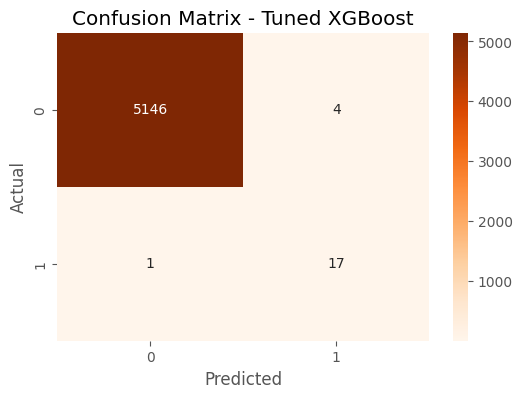

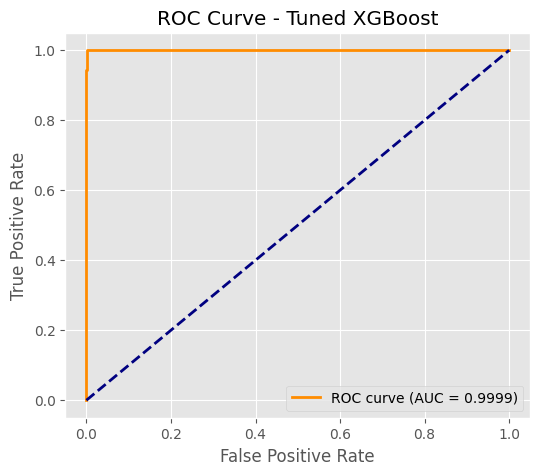

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Train final model
best_xgb = XGBClassifier(
    **study.best_trial.params,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

best_xgb.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_xgb = best_xgb.predict(X_test)
y_pred_xgb_proba = best_xgb.predict_proba(X_test)[:, 1]

# Evaluation
print("\n✅ Final XGBoost Model with Optuna-Tuned Hyperparameters\n")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb, digits=4))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Tuned XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC–AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve - Tuned XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


In [20]:
optuna.visualization.plot_optimization_history(study)
optuna.visualization.plot_param_importances(study)


In [21]:
!pip install lightgbm optuna

In [22]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score

def objective(trial):
    # Define search space
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'random_state': 42,
        'n_jobs': -1
    }

    # Build model
    model = LGBMClassifier(**param)
    model.fit(X_train_resampled, y_train_resampled)

    # Predict and compute F1-score
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred)
    return score

# Run optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30, show_progress_bar=True)

# Print best trial
print("✅ Best Trial:")
print("F1 Score:", study.best_trial.value)
print("Best Params:", study.best_trial.params)


[I 2025-11-14 03:11:16,042] A new study created in memory with name: no-name-375ddac2-927f-42ad-a91b-5b65bb2a4499


  0%|          | 0/30 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Info] Number of positive: 20599, number of negative: 20599
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010719 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 41198, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

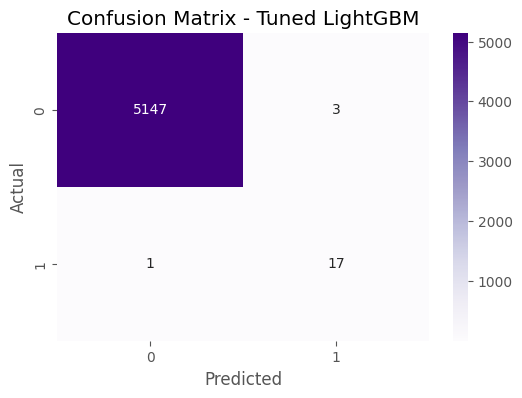

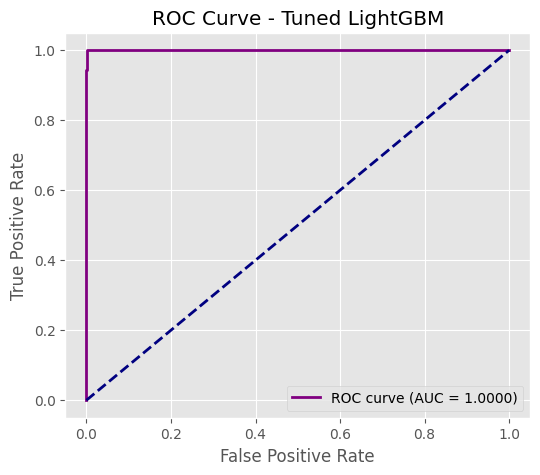

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Train final model
best_lgbm = LGBMClassifier(
    **study.best_trial.params,
    random_state=42,
    n_jobs=-1
)

best_lgbm.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_lgbm = best_lgbm.predict(X_test)
y_pred_lgbm_proba = best_lgbm.predict_proba(X_test)[:, 1]

# Evaluation
print("\n✅ Final LightGBM Model with Optuna-Tuned Hyperparameters\n")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm, digits=4))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Tuned LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC–AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_lgbm_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve - Tuned LightGBM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


In [24]:
optuna.visualization.plot_optimization_history(study)
optuna.visualization.plot_param_importances(study)


/tmp/ipython-input-527773272.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




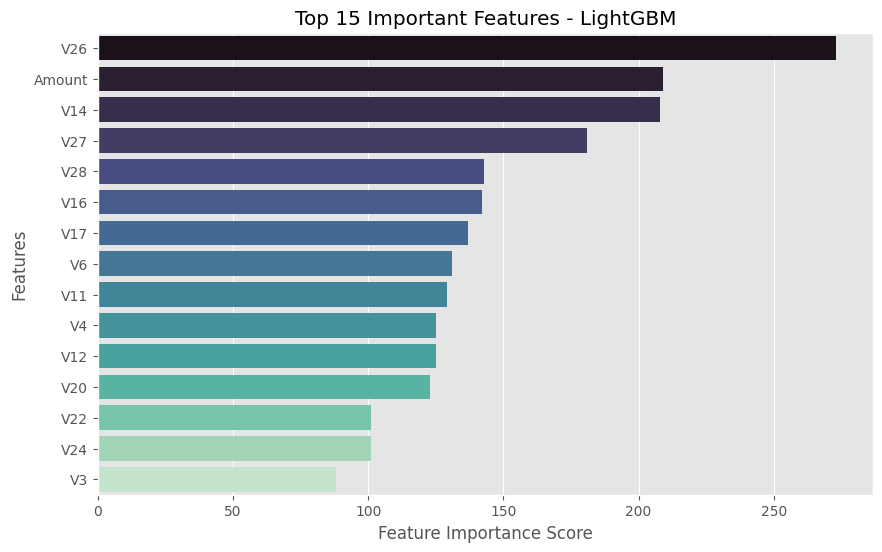

In [25]:
import pandas as pd

feature_importances = pd.Series(best_lgbm.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances[:15], y=feature_importances[:15].index, palette='mako')
plt.title("Top 15 Important Features - LightGBM")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()
